# Neural-based channel decoders


Using TensorFlow backend.


Start EbN0 1/20 -15.0
Start EbN0 2/20 -13.894736842105264
Start EbN0 3/20 -12.789473684210526
Start EbN0 4/20 -11.68421052631579
Start EbN0 5/20 -10.578947368421051
Start EbN0 6/20 -9.473684210526315
Start EbN0 7/20 -8.368421052631579
Start EbN0 8/20 -7.263157894736842
Start EbN0 9/20 -6.157894736842104
Start EbN0 10/20 -5.052631578947368
Start EbN0 11/20 -3.94736842105263
Start EbN0 12/20 -2.842105263157894
Start EbN0 13/20 -1.7368421052631575
Start EbN0 14/20 -0.6315789473684195
Start EbN0 15/20 0.4736842105263168
Start EbN0 16/20 1.5789473684210549
Start EbN0 17/20 2.684210526315791
Start EbN0 18/20 3.7894736842105274
Start EbN0 19/20 4.894736842105264
Start EbN0 20/20 6.0


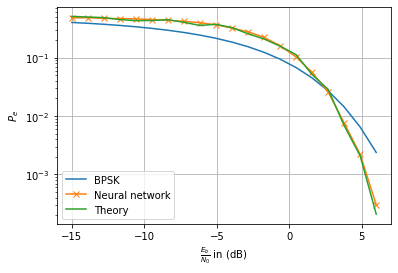

Elapsed : 21.02 s


In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import keras 
import time

from keras.models import load_model

from src.communications import Transmitter, AWGNChannel, Receiver, ReceiverMode, TransmitterMode
from src.utils import ber_performance, get_basic_channel_fct, show_ber, get_fec_matrix

# Configuration
MODULATION = 'BPSK'
FEC_MATRIX = 'POLAR_8_16'
EbN0dBs = np.linspace(-15, 6, 20)

# Load models
encoder_model = load_model('networks/encoder.h5')
decoder_model = load_model('networks/decoder.h5')
G = get_fec_matrix(FEC_MATRIX)

# Load channel components
transmitter = Transmitter(MODULATION, G, TransmitterMode.NETWORK, encoder_model)
channel = AWGNChannel(MODULATION, G)
receiver = Receiver(MODULATION, G, ReceiverMode.NETWORK, decoder_model)

if __name__ == '__main__':
    t = time.time()
    BER = ber_performance(
        EbN0dBs,
        get_basic_channel_fct(transmitter, channel, receiver),
        np.size(G, 0) * 5000,
        200
    )
    
    # Plot results
    [EbN0dBs_C, BER_C] = np.loadtxt('BER_G_MAP.csv', delimiter=',')
    
    plt.figure()
    show_ber(MODULATION, EbN0dBs, BER)
    plt.plot(EbN0dBs_C, BER_C)
    plt.legend(['BPSK', f'Neural network', 'Theory'])
    plt.show()
    
    # Save results
    np.savetxt(
        f'outputs/BER_complete_[{MODULATION}]_[{FEC_MATRIX}].csv', 
        [np.array(EbN0dBs), np.array(BER)], delimiter=','
    )
    
    print(f'Elapsed : {np.round(time.time() - t, 2)} s')
